In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from numpy import loadtxt
import numpy as np

In [2]:
# Load data
X = loadtxt('features.csv', delimiter=",")
y = loadtxt('labels.csv', delimiter=",")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=25)

# Define the model
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=21, random_state=25)

# Perform k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=25)
cv_results = cross_val_score(rf_classifier, X, y, cv=kf, scoring='f1_weighted')

# Print cross-validation results
print(f'Cross-Validation Accuracy Scores: {cv_results}')
print(f'Mean Cross-Validation Accuracy: {cv_results.mean()}')

# Train the model on the full training set
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Cross-Validation Accuracy Scores: [1.         1.         0.99886219 1.         1.         1.
 1.         1.         1.         1.        ]
Mean Cross-Validation Accuracy: 0.9998862194398983
Accuracy: 0.9991462720546386
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1538
         1.0       1.00      1.00      1.00      1976

    accuracy                           1.00      3514
   macro avg       1.00      1.00      1.00      3514
weighted avg       1.00      1.00      1.00      3514

Confusion Matrix:
[[1538    0]
 [   3 1973]]


In [3]:
feature_names = None  

def plot_forest_trees(rf_classifier, num_trees=5):
    num_trees = min(num_trees, len(rf_classifier.estimators_))
    
    fig, axes = plt.subplots(nrows=num_trees, ncols=1, figsize=(20, 40), dpi=300)
    
    for index in range(num_trees):
        ax = axes[index]
        plot_tree(rf_classifier.estimators_[index], ax=ax, filled=True, rounded=True)
        ax.set_title(f'Tree {index + 1}')
    
    plt.tight_layout()
    plt.show()

plot_forest_trees(rf_classifier, num_trees=5)

In [4]:
print(y_test)
num_zeros = np.sum(y_test == 0.0)
num_ones = np.sum(y_test == 1.0)

print(num_zeros)
print(num_ones)

print(y_train)
num_zeros = np.sum(y_train == 0.0)
num_ones = np.sum(y_train == 1.0)

print(num_zeros)
print(num_ones)

[0. 0. 1. ... 0. 1. 1.]
1538
1976
[1. 0. 0. ... 1. 0. 0.]
2246
3024


In [5]:
def confusio_matrix(y_test, y_predicted):
    class_names = ['0', '1']
    cm = confusion_matrix(y_test, y_predicted)
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    num_classes = len(class_names)
    plt.xticks(np.arange(num_classes), class_names, rotation=45)
    plt.yticks(np.arange(num_classes), class_names)
    
    for i in range(num_classes):
        for j in range(num_classes):
            plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

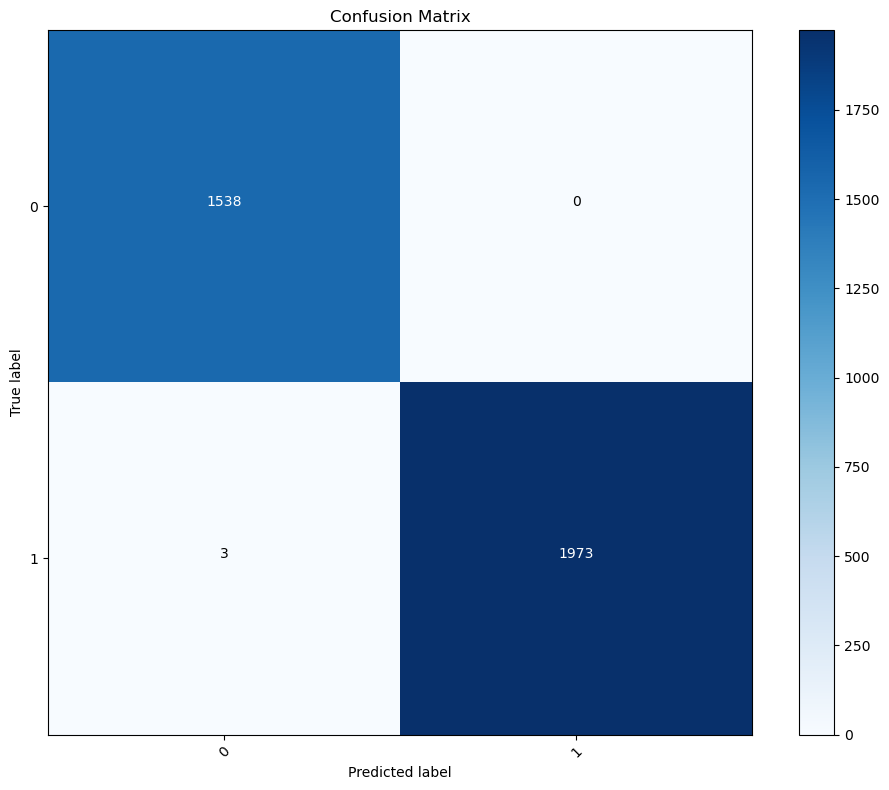

In [6]:
confusio_matrix(y_test, y_pred)

In [7]:
y_pred_train = rf_classifier.predict(X_train)

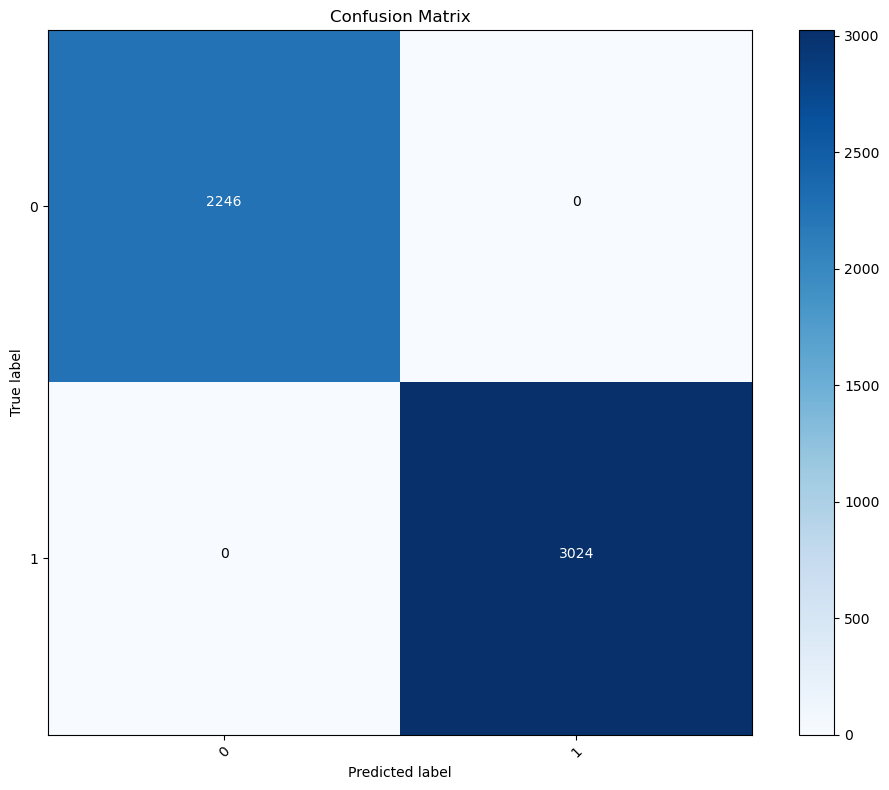

In [8]:
confusio_matrix(y_train, y_pred_train)